In [33]:
import pandas as pd
import numpy as np

In [37]:
crsp=pd.read_csv('CRSP_1985-2019.csv',low_memory=False)
crsp

,PERMNO,date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,...,CFACSHR,ALTPRC,SPREAD,ALTPRCDT,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
0,10000,19851231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-2.56250,NaN,19860107.0,NaN,0.043061,0.040080,0.028021,0.026355,0.045061
1,10000,19860131,19861203.0,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-4.37500,0.250,19860131.0,C,0.009829,0.008006,0.044071,0.043082,0.002367
2,10000,19860228,NaN,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-3.25000,0.250,19860228.0,-0.257143,0.072500,0.068190,0.060381,0.058938,0.071489
3,10000,19860331,NaN,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-4.43750,0.125,19860331.0,0.365385,0.053885,0.051360,0.047192,0.045679,0.052794
4,10000,19860430,NaN,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,...,1.0,-4.00000,0.250,19860430.0,-0.098592,-0.007903,-0.009633,0.016140,0.015141,-0.014148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162482,93436,20190830,NaN,11.0,3.0,9999,88160R10,TSLA,TESLA INC,NaN,...,1.0,225.61000,NaN,20190830.0,-0.066222,-0.020271,-0.022301,-0.040001,-0.041599,-0.018092
3162483,93436,20190930,NaN,11.0,3.0,9999,88160R10,TSLA,TESLA INC,NaN,...,1.0,240.87000,NaN,20190930.0,0.067639,0.016024,0.014162,0.017680,0.015359,0.017181
3162484,93436,20191031,NaN,11.0,3.0,9999,88160R10,TSLA,TESLA INC,NaN,...,1.0,314.92001,NaN,20191031.0,0.307427,0.019265,0.018094,0.006291,0.005261,0.020432
3162485,93436,20191129,NaN,11.0,3.0,9999,88160R10,TSLA,TESLA INC,NaN,...,1.0,329.94000,NaN,20191129.0,0.047695,0.034971,0.032961,0.026624,0.024961,0.034047


In [39]:
#check all the columns
crsp.columns
# refer to http://www.crsp.org/products/documentation/stock-data-structure

Index(['PERMNO', 'date', 'NAMEENDT', 'SHRCD', 'EXCHCD', 'SICCD', 'NCUSIP',
       'TICKER', 'COMNAM', 'SHRCLS', 'TSYMBOL', 'NAICS', 'PRIMEXCH', 'TRDSTAT',
       'SECSTAT', 'PERMCO', 'ISSUNO', 'HEXCD', 'HSICCD', 'CUSIP', 'DCLRDT',
       'DLAMT', 'DLPDT', 'DLSTCD', 'NEXTDT', 'PAYDT', 'RCRDDT', 'SHRFLG',
       'HSICMG', 'HSICIG', 'DISTCD', 'DIVAMT', 'FACPR', 'FACSHR', 'ACPERM',
       'ACCOMP', 'SHRENDDT', 'NWPERM', 'DLRETX', 'DLPRC', 'DLRET', 'TRTSCD',
       'NMSIND', 'MMCNT', 'NSDINX', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET',
       'BID', 'ASK', 'SHROUT', 'CFACPR', 'CFACSHR', 'ALTPRC', 'SPREAD',
       'ALTPRCDT', 'RETX', 'vwretd', 'vwretx', 'ewretd', 'ewretx', 'sprtrn'],
      dtype='object')

In [40]:
#There are multiple values for one PERMNO(stock price on each trading day)
#There are 28537 PERMNO
len(crsp['PERMNO'].unique())

28357

In [41]:
#There are 61 types delisting code for these companies
crsp['DLSTCD'].unique()

array([ nan, 560., 233., 231., 551., 552., 570., 561., 241., 100., 580.,
       341., 232., 200., 584., 520., 582., 581., 575., 300., 550., 574.,
       450., 500., 331., 261., 400., 585., 242., 573., 342., 490., 234.,
       591., 332., 587., 244., 460., 262., 470., 252., 251., 243., 290.,
       235., 513., 516., 333., 588., 271., 505., 517., 510., 343., 205.,
       280., 519., 480., 583., 361., 253.])

In [42]:
#Every company has a delisting code on their last trading day
#Remove all the lines where DLSTCD is nan
CRSP_u = crsp[['TICKER','PERMNO','date','DLSTCD', 'SICCD']]
CRSP_u.drop(CRSP_u[np.isnan(CRSP_u['DLSTCD'])].index,inplace=True)
#There are 31072 delisting records. 
print(len(CRSP_u))
#There are 28537 PERMNO
print(len(CRSP_u['PERMNO'].unique()))
#A company can be delisted several times. 

31072
28278


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
#Since we focus on bankruptcy, we take last delisting code.
CRSP_u=CRSP_u.copy()
CRSP_final=CRSP_u.drop_duplicates('PERMNO','last',inplace=False).reset_index()
CRSP_final

,index,TICKER,PERMNO,date,DLSTCD,SICCD
0,18,OMFGA,10000,19870630,560.0,3990
1,401,EGAS,10001,20170831,233.0,4925
2,729,BTFG,10002,20130228,231.0,6020
3,850,GCBK,10003,19951229,231.0,6020
4,918,WERC,10005,19910731,560.0,1310
...,...,...,...,...,...,...
28273,3162148,JGBO,93432,20110531,585.0,7389
28274,3162229,VLTC,93433,20161230,584.0,9999
28275,3162345,SANW,93434,20191231,100.0,9999
28276,3162370,SCEI,93435,20120531,584.0,6163


#### 1.Delisting Reason

In [44]:
# refer to http://www.crsp.org/products/documentation/delisting-codes for the reason
CRSP_reason=CRSP_final.copy()
def delist(row):
    if True:
        return str(row['DLSTCD'])[0]
CRSP_reason['Delist_Reason'] = CRSP_reason.apply(lambda row:delist(row), axis = 1)
CRSP_reason

,index,TICKER,PERMNO,date,DLSTCD,SICCD,Delist_Reason
0,18,OMFGA,10000,19870630,560.0,3990,5
1,401,EGAS,10001,20170831,233.0,4925,2
2,729,BTFG,10002,20130228,231.0,6020,2
3,850,GCBK,10003,19951229,231.0,6020,2
4,918,WERC,10005,19910731,560.0,1310,5
...,...,...,...,...,...,...,...
28273,3162148,JGBO,93432,20110531,585.0,7389,5
28274,3162229,VLTC,93433,20161230,584.0,9999,5
28275,3162345,SANW,93434,20191231,100.0,9999,1
28276,3162370,SCEI,93435,20120531,584.0,6163,5


               count
Delist_Reason       
2              10606
5               8108
1               7594
4               1264
3                706


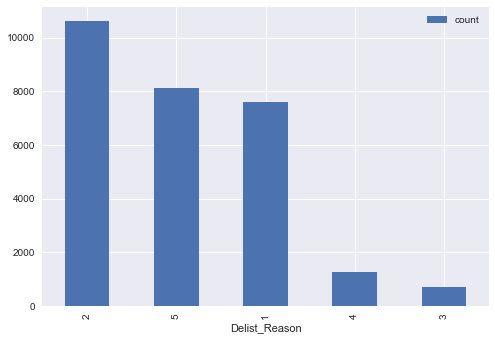

In [45]:
delist=CRSP_reason.groupby(['Delist_Reason']).size().to_frame()
delist.columns=['count']
delist=delist.sort_values(by='count',ascending=False)
print(delist)
#draw Delist Reason
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
delist.plot(kind='bar')
#1:active 2:mergers 3:exchange 4:liquidation 5:dropped 6:expiration 9:demestic to foreign

#### 2.bankruptcy among liquidation reason

        count
DLSTCD       
560.0    1375
552.0    1169
580.0     993
584.0     873
574.0     729
561.0     709
570.0     610
550.0     437
520.0     340
585.0     191
582.0     165
551.0     163
581.0     111
573.0      87
588.0      48
500.0      40
505.0      18
587.0      18
575.0       9
591.0       7
583.0       5
516.0       4
519.0       2
517.0       2
510.0       2
513.0       1


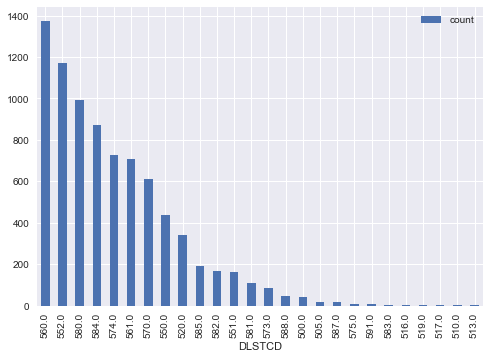

In [46]:
CRSP_5=CRSP_reason[CRSP_reason['Delist_Reason']=='5']
CRSP_574=CRSP_5.groupby(['DLSTCD']).size().to_frame()
CRSP_574.columns=['count']
CRSP_574=CRSP_574.sort_values(by='count',ascending=False)
print(CRSP_574)
#draw Delist Reason
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
CRSP_574.plot(kind='bar')
#1:active 2:mergers 3:exchange 4:liquidation 5:dropped 6:expiration 9:demestic to foreign

#### 3.Bankruptcy throughout the year

In [47]:
CRSP_year=CRSP_reason.copy()
def year(row):
    if True:
        return str(row['date'])[0:4]
CRSP_year['year'] = CRSP_year.apply(lambda row:year(row), axis = 1)
CRSP_year

,index,TICKER,PERMNO,date,DLSTCD,SICCD,Delist_Reason,year
0,18,OMFGA,10000,19870630,560.0,3990,5,1987
1,401,EGAS,10001,20170831,233.0,4925,2,2017
2,729,BTFG,10002,20130228,231.0,6020,2,2013
3,850,GCBK,10003,19951229,231.0,6020,2,1995
4,918,WERC,10005,19910731,560.0,1310,5,1991
...,...,...,...,...,...,...,...,...
28273,3162148,JGBO,93432,20110531,585.0,7389,5,2011
28274,3162229,VLTC,93433,20161230,584.0,9999,5,2016
28275,3162345,SANW,93434,20191231,100.0,9999,1,2019
28276,3162370,SCEI,93435,20120531,584.0,6163,5,2012


In [48]:
#1 means active. drop 1
year_bank = CRSP_year.groupby(['year', 'Delist_Reason']).size().unstack()
year_bank

Delist_Reason,1,2,3,4,5
year,,,,,
1985,NaN,250.0,25.0,17.0,330.0
1986,NaN,233.0,91.0,26.0,323.0
1987,NaN,187.0,97.0,6.0,229.0
1988,NaN,367.0,35.0,12.0,322.0
1989,NaN,281.0,3.0,13.0,324.0
1990,NaN,204.0,4.0,9.0,345.0
1991,NaN,121.0,4.0,12.0,369.0
1992,NaN,137.0,73.0,9.0,402.0
1993,NaN,180.0,10.0,3.0,173.0


In [49]:
year_delist=CRSP_year.groupby(['year']).size().to_frame()
year_delist.columns=['delist']
year_bankrupt = CRSP_year.groupby(['year', 'DLSTCD']).size().unstack().iloc[:,49:50]
year=year_delist.merge(year_bankrupt,on='year')
year.columns=['delist','bankruptcy']
def rate(x,y):
    return x/y
year['bankruptcy_rate'] = year.apply(lambda x: rate(x['bankruptcy'],x['delist']),axis=1)
year

,delist,bankruptcy,bankruptcy_rate
year,,,
1985,622,11.0,0.017685
1986,673,14.0,0.020802
1987,519,7.0,0.013487
1988,736,25.0,0.033967
1989,621,13.0,0.020934
1990,562,30.0,0.053381
1991,506,60.0,0.118577
1992,621,47.0,0.075684
1993,366,26.0,0.071038


Text(0.5, 1.0, 'Bankrupt Rate Over Years')

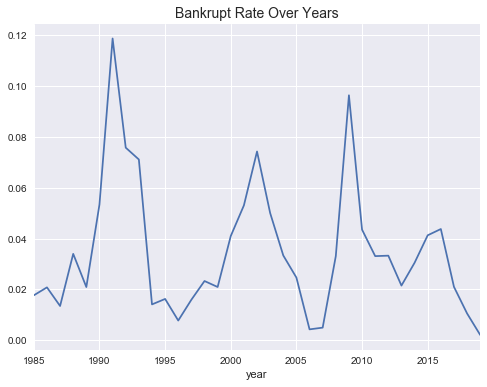

In [50]:
year['bankruptcy_rate'].plot(figsize=(8, 6))
plt.title('Bankrupt Rate Over Years', fontsize=14)

#### 4.bankruptcy throughout the industry

In [54]:
CRSP_industry=CRSP_final.copy()
def industry(x):
    return x['SICCD'][0]
CRSP_industry['industry'] = CRSP_industry.apply(lambda x: industry(x),axis=1)
CRSP_industry

,index,TICKER,PERMNO,date,DLSTCD,SICCD,industry
0,18,OMFGA,10000,19870630,560.0,3990,3
1,401,EGAS,10001,20170831,233.0,4925,4
2,729,BTFG,10002,20130228,231.0,6020,6
3,850,GCBK,10003,19951229,231.0,6020,6
4,918,WERC,10005,19910731,560.0,1310,1
...,...,...,...,...,...,...,...
28273,3162148,JGBO,93432,20110531,585.0,7389,7
28274,3162229,VLTC,93433,20161230,584.0,9999,9
28275,3162345,SANW,93434,20191231,100.0,9999,9
28276,3162370,SCEI,93435,20120531,584.0,6163,6


In [55]:
industry_delist=CRSP_industry.groupby(['industry']).size().to_frame()
industry_delist.columns=['count']
industry_bankrupt = CRSP_industry.groupby(['industry', 'DLSTCD']).size().unstack().iloc[:,49:50]
industry=industry_delist.merge(industry_bankrupt,on='industry')
industry.columns=['industry','bankruptcy']
def rate(x,y):
    return x/y
industry['bankruptcy_rate'] = industry.apply(lambda x: rate(x['bankruptcy'],x['industry']),axis=1)
industry.drop(industry[np.isnan(industry['bankruptcy_rate'])].index,inplace=True)
industry

,industry,bankruptcy,bankruptcy_rate
industry,,,
0,85,1.0,0.011765
1,1849,84.0,0.045430
2,2471,80.0,0.032376
3,4793,142.0,0.029627
4,1898,79.0,0.041623
5,2096,102.0,0.048664
6,9159,118.0,0.012884
7,3163,67.0,0.021182
8,1108,32.0,0.028881


In [56]:
industry

,industry,bankruptcy,bankruptcy_rate
industry,,,
0,85,1.0,0.011765
1,1849,84.0,0.045430
2,2471,80.0,0.032376
3,4793,142.0,0.029627
4,1898,79.0,0.041623
5,2096,102.0,0.048664
6,9159,118.0,0.012884
7,3163,67.0,0.021182
8,1108,32.0,0.028881


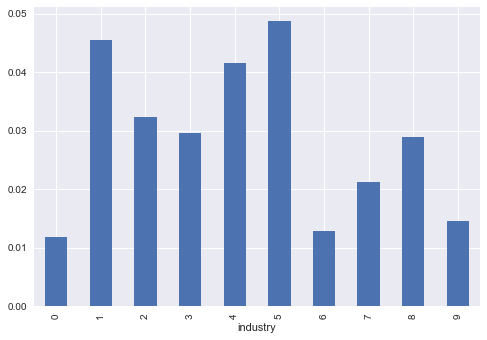

In [57]:
industry['bankruptcy_rate'].plot(kind='bar')